In [12]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/healthcare-dataset-2019-2024/healthcare_dataset.csv


In [13]:
df = pd.read_csv("/kaggle/input/healthcare-dataset-2019-2024/healthcare_dataset.csv")

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55500 entries, 0 to 55499
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                55500 non-null  object 
 1   Age                 55500 non-null  int64  
 2   Gender              55500 non-null  object 
 3   Blood Type          55500 non-null  object 
 4   Medical Condition   55500 non-null  object 
 5   Date of Admission   55500 non-null  object 
 6   Doctor              55500 non-null  object 
 7   Hospital            55500 non-null  object 
 8   Insurance Provider  55500 non-null  object 
 9   Billing Amount      55500 non-null  float64
 10  Room Number         55500 non-null  int64  
 11  Admission Type      55500 non-null  object 
 12  Discharge Date      55500 non-null  object 
 13  Medication          55500 non-null  object 
 14  Test Results        55500 non-null  object 
dtypes: float64(1), int64(2), object(12)
memory usage: 6.4

In [33]:
df = df.drop('Name', axis=1)
df['Discharge Date'] = pd.to_datetime(df['Discharge Date'])
df['Date of Admission'] = pd.to_datetime(df['Date of Admission'])

In [15]:
print("Null values:", df.isnull().sum())
print("Duplicate entries:", df.duplicated(['Name']).sum())

Null values: Name                  0
Age                   0
Gender                0
Blood Type            0
Medical Condition     0
Date of Admission     0
Doctor                0
Hospital              0
Insurance Provider    0
Billing Amount        0
Room Number           0
Admission Type        0
Discharge Date        0
Medication            0
Test Results          0
dtype: int64
Duplicate entries: 5508


In [16]:
df['Name'] = df['Name'].str.lower().str.title()
df.head(5)

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby Jackson,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,Leslie Terry,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,Danny Smith,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal
3,Andrew Watts,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,Adrienne Bell,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal


In [34]:
df.describe()

,Age,Date of Admission,Billing Amount,Room Number,Discharge Date
count,55500.000000,55500,55500.000000,55500.000000,55500
mean,51.539459,2021-11-01 01:02:22.443243008,25539.316097,301.134829,2021-11-16 13:15:20.821621504
min,13.000000,2019-05-08 00:00:00,-2008.492140,101.000000,2019-05-09 00:00:00
25%,35.000000,2020-07-28 00:00:00,13241.224652,202.000000,2020-08-12 00:00:00
50%,52.000000,2021-11-01 00:00:00,25538.069376,302.000000,2021-11-17 00:00:00
75%,68.000000,2023-02-03 00:00:00,37820.508436,401.000000,2023-02-18 00:00:00
max,89.000000,2024-05-07 00:00:00,52764.276736,500.000000,2024-06-06 00:00:00
std,19.602454,NaN,14211.454431,115.243069,NaN


In [17]:
dupes = df[df.duplicated('Name', keep=False)]['Name']
print(dupes)

4             Adrienne Bell
5             Emily Johnson
6            Edward Edwards
7        Christina Martinez
9          Christopher Berg
                ...        
55495     Elizabeth Jackson
55496            Kyle Perez
55497          Heather Wang
55498        Jennifer Jones
55499          James Garcia
Name: Name, Length: 25005, dtype: object


In [18]:
ccs = ['Blood Type', 'Medical Condition', 'Insurance Provider', 'Admission Type', 'Medication']
nunique = df[ccs].apply(pd.Series.nunique)
print(nunique)

Blood Type            8
Medical Condition     6
Insurance Provider    5
Admission Type        3
Medication            5
dtype: int64


In [19]:
for col in ccs: 
    uniquecols = df[col].unique()
    print(f"Unique values in '{col}': {uniquecols}")

Unique values in 'Blood Type': ['B-' 'A+' 'A-' 'O+' 'AB+' 'AB-' 'B+' 'O-']
Unique values in 'Medical Condition': ['Cancer' 'Obesity' 'Diabetes' 'Asthma' 'Hypertension' 'Arthritis']
Unique values in 'Insurance Provider': ['Blue Cross' 'Medicare' 'Aetna' 'UnitedHealthcare' 'Cigna']
Unique values in 'Admission Type': ['Urgent' 'Emergency' 'Elective']
Unique values in 'Medication': ['Paracetamol' 'Ibuprofen' 'Aspirin' 'Penicillin' 'Lipitor']


In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

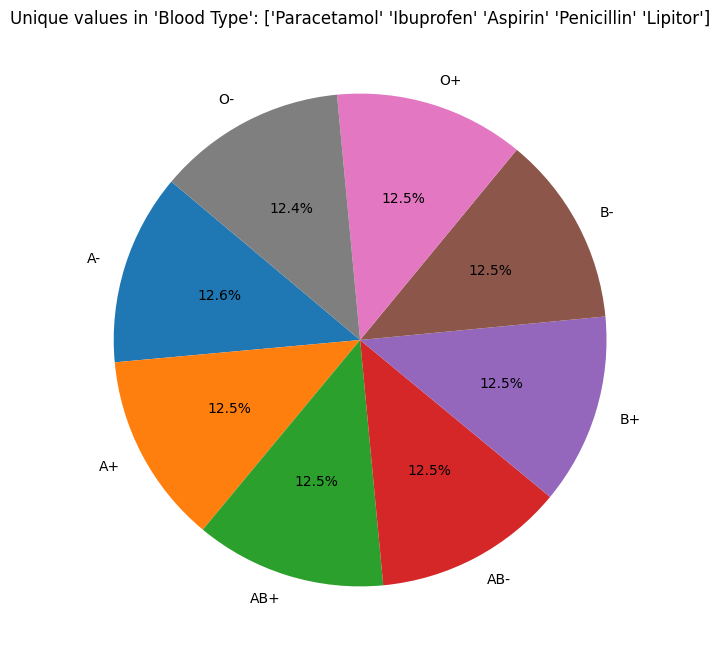

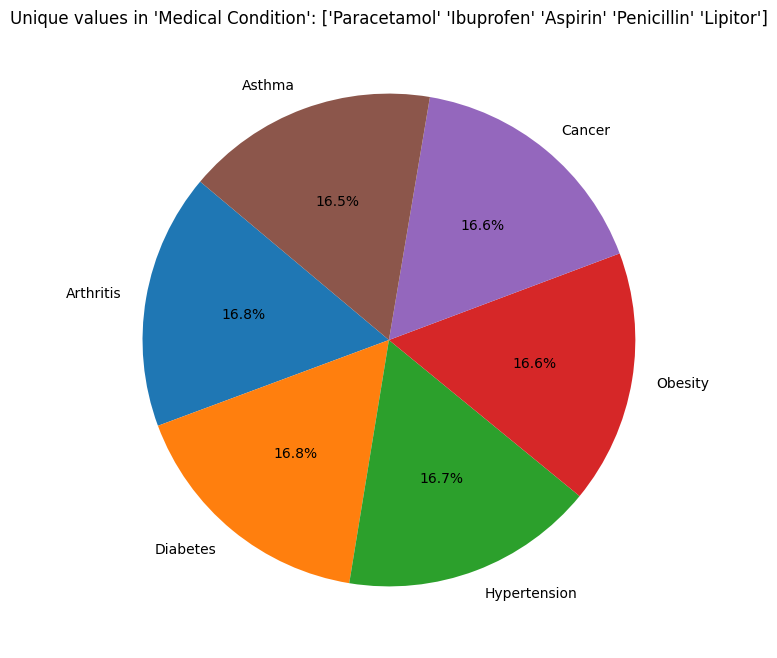

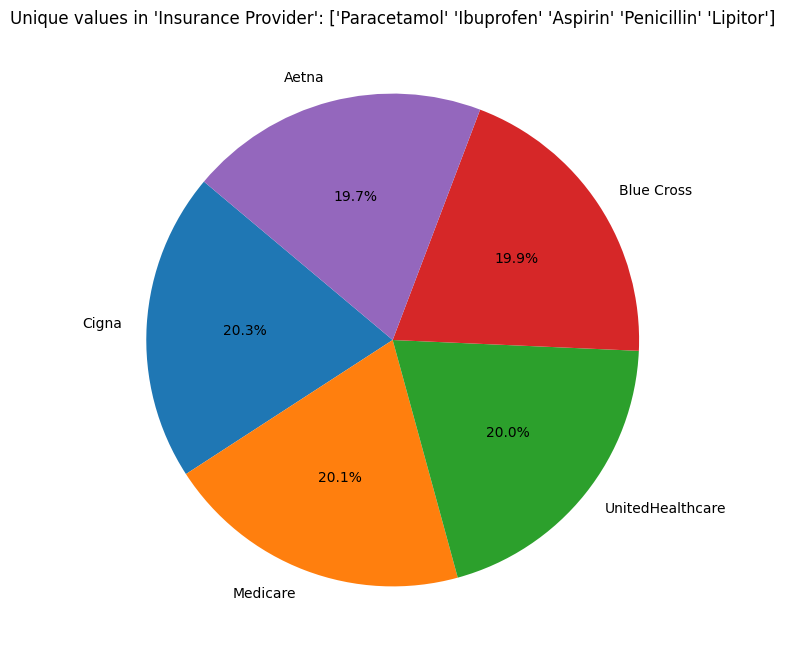

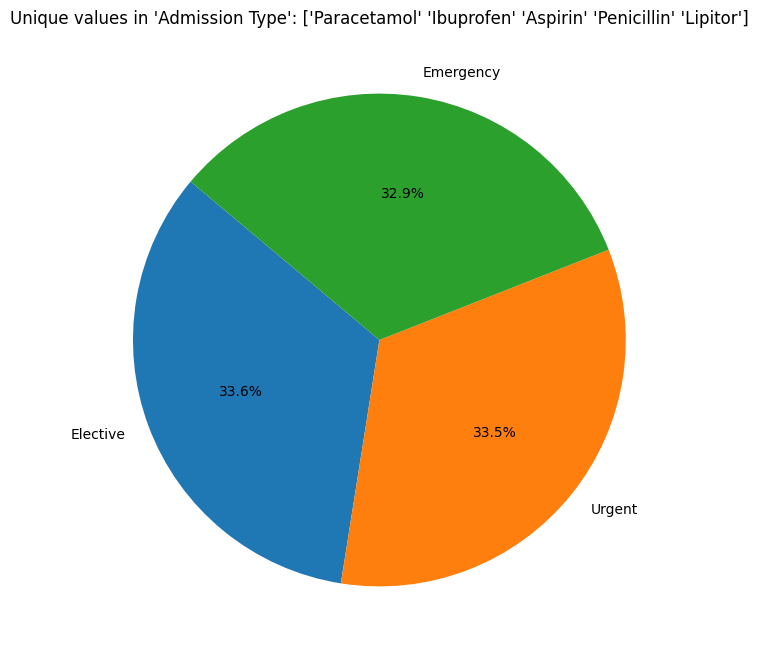

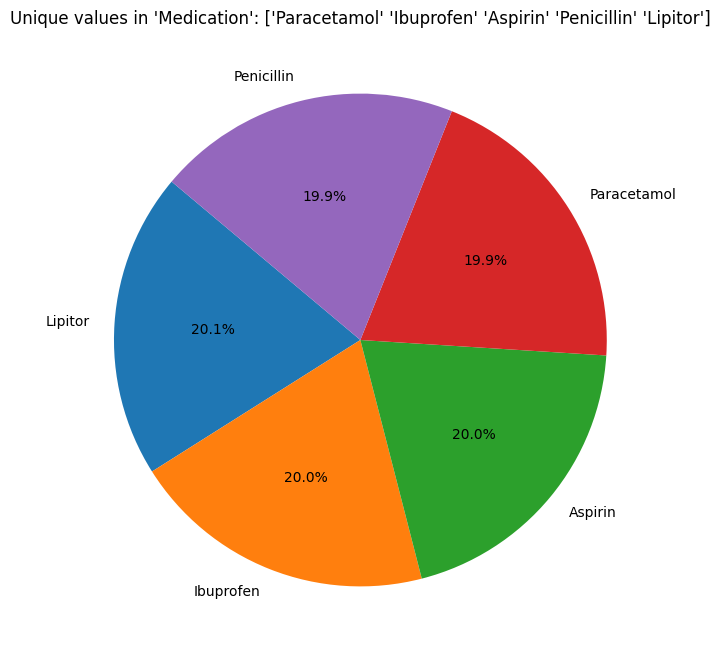

In [21]:
for col in ccs:
    ccdist = df[col].value_counts()
    plt.figure(figsize = (8,8))
    palette_color = sns.color_palette('pastel')
    plt.pie(ccdist, labels=ccdist.index, autopct='%1.1f%%', startangle=140)
    pietitle = f"Unique values in '{col}': {uniquecols}"
    plt.title(pietitle)  
    plt.show()

I want to see on average how much a patients billing is based on a given group from a category. 

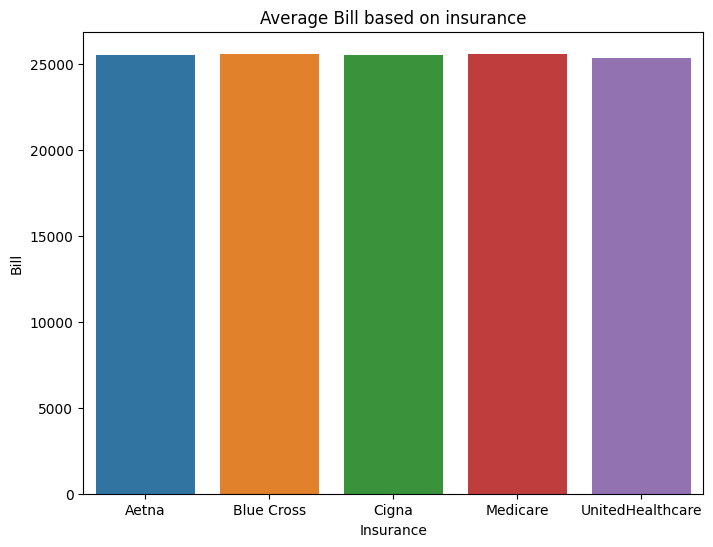

In [23]:
avgbill = df.groupby('Insurance Provider')['Billing Amount'].mean().reset_index()
plt.figure(figsize = (8,6))
sns.barplot(data=avgbill, x='Insurance Provider', y='Billing Amount')
bartitle = 'Average Bill based on insurance'
plt.title(bartitle)
plt.xlabel('Insurance')
plt.ylabel('Bill')
plt.show()

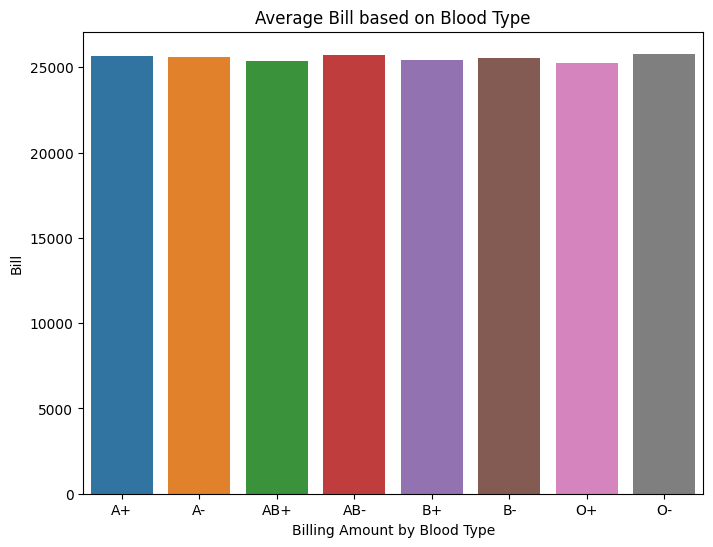

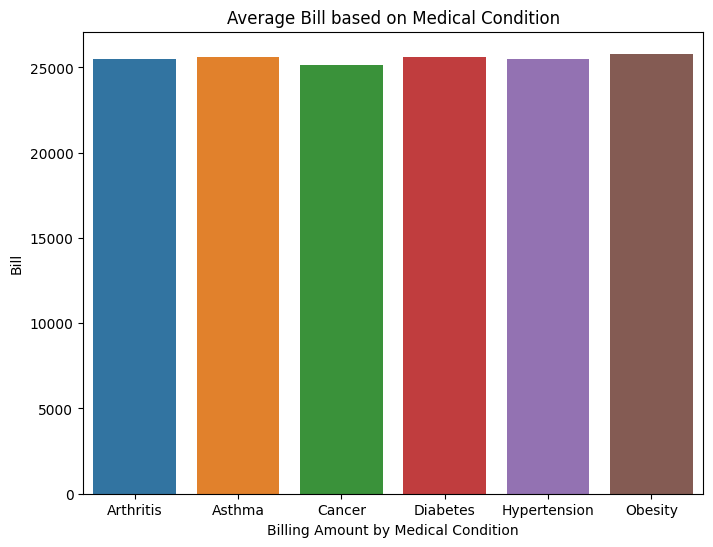

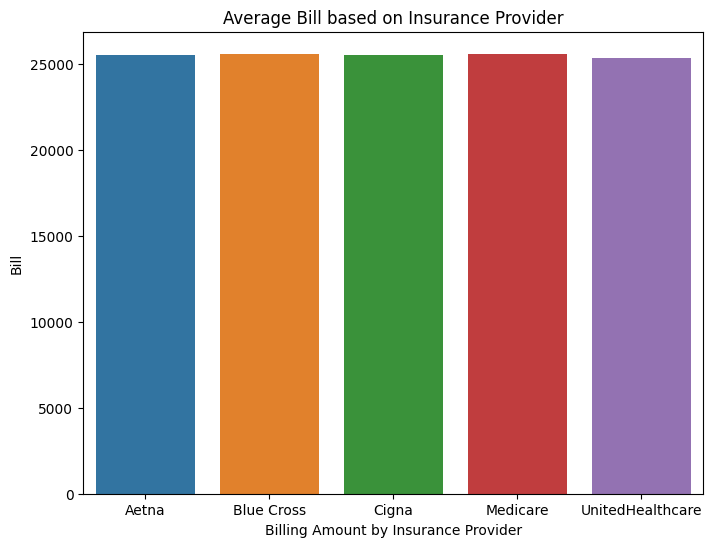

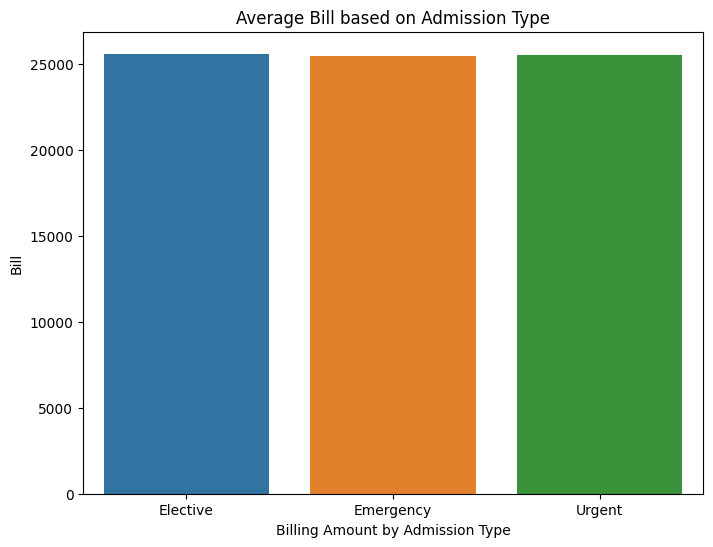

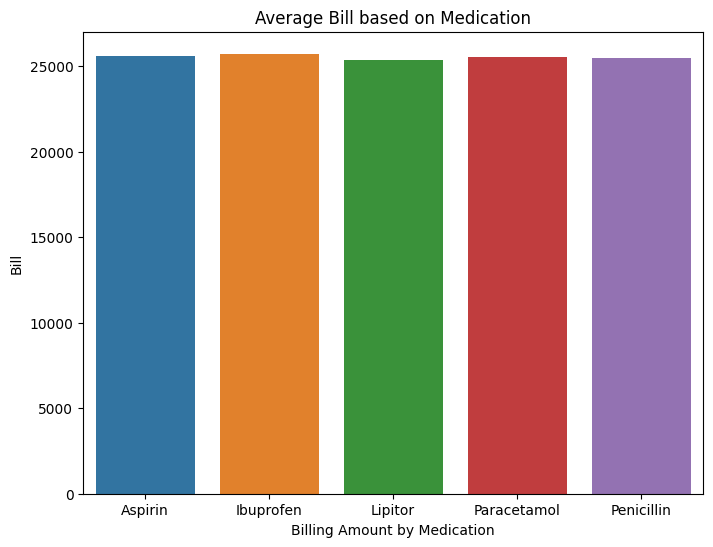

In [27]:
for col in ccs: 
    bill = df.groupby(col)['Billing Amount'].mean().reset_index()
    plt.figure(figsize = (8,6))
    sns.barplot(data=bill, x=col, y='Billing Amount')
    bartitle = (f'Average Bill based on {col}')
    plt.title(bartitle)
    plt.xlabel(f'Billing Amount by {col}')
    plt.ylabel('Bill')
    plt.show()


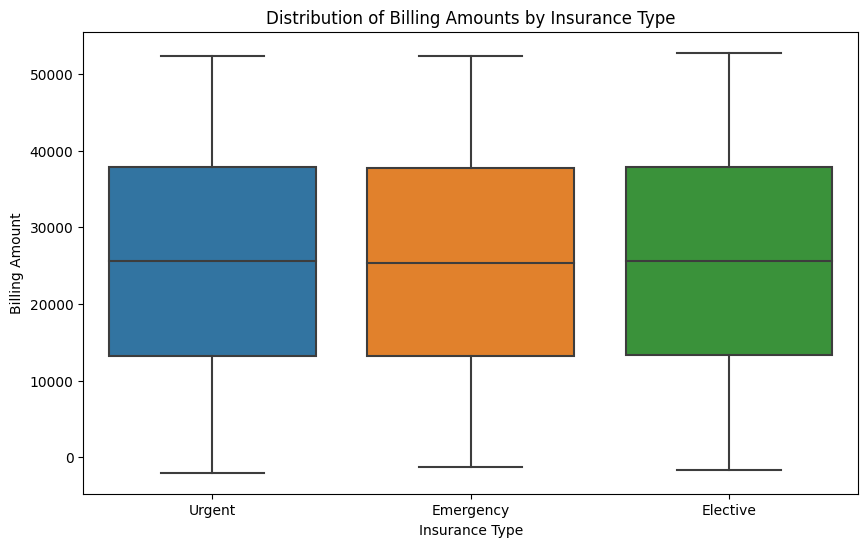

In [29]:
plt.figure(figsize=(10,6))

sns.boxplot(data=df, x='Admission Type', y='Billing Amount')
# Add labels and title
plt.xlabel('Insurance Type')
plt.ylabel('Billing Amount')
plt.title('Distribution of Billing Amounts by Insurance Type')

# Show the plot
plt.show()
